In [26]:
import numpy as np
import matplotlib.pyplot as plt
from thinkdsp import UncorrelatedGaussianNoise
from dft import dft
from thinkdsp import decorate

Упражнение 7.2

Стоит отметить, что функция FFT работает только с сигналами, framerate которых равен значению по степеням двойки.

In [2]:
def FFT(ys):
    N = len(ys)
    if N == 1:
        return ys
    e = FFT(ys[::2])
    o = FFT(ys[1::2])
    ns = np.arange(N)
    W = np.exp(-2 * np.pi * 1j * ns / N)
    return np.tile(e, 2) + W * np.tile(o, 2)

Сравним результат, который будет получен с помощью рекурсивной функции быстрого преобразования Фурье с результатом, полученным с помощью дискретного преобразования Фурье.

In [20]:
signal = UncorrelatedGaussianNoise()
r = 2 ** np.arange(9, 15)
waves = []
for i in r:
    waves.append(signal.make_wave(duration = 1, framerate = i))

In [30]:
def Speed_Test(func, mode, values):
    results = []
    for N in waves:
        print(len(N.ys))
        if (mode):
            result = %timeit -r1 -o FFT(N.ys)
            value = FFT(N.ys)
        else:
            result = %timeit -r1 -o dft(N.ys)
            value = dft(N.ys)
        results.append(result)
        values.append(value)
        
    res = [result.best for result in results]
    return res

In [34]:
valFFT = []
resFFT = Speed_Test(FFT, 1, valFFT)

512
7.49 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
1024
15.4 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
2048
29.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
4096
59.7 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
8192
119 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
16384
241 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [35]:
valDFT = []
resDFT = Speed_Test(dft, 0, valDFT)

512
15.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 100 loops each)
1024
61.9 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
2048
244 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
4096
1.02 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
8192
3.97 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
16384
15.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Видно, что результат полученный обоими методами почти совпадает:

In [37]:
vals = []
k = 0
while k < len(r):
    vals.append(np.sum(np.abs(valDFT[k] - valFFT[k])))
    k += 1
print (vals)

[5.426125383490976e-10, 3.2649018268070488e-09, 1.8653277802594152e-08, 1.0795562447367361e-07, 6.096078773177868e-07, 3.4251888747394415e-06]


На графике видно, что дискретное преобразование Фурье значительно уступает по времени быстрому преобразованию Фурье:

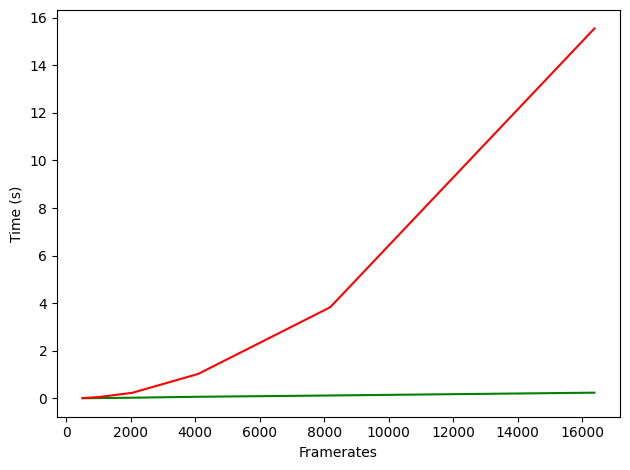

In [27]:
plt.plot(r, resFFT, color = "green")
plt.plot(r, resDFT, color = "red")
decorate(xlabel = 'Framerates', ylabel = 'Time (s)')